In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [105]:
des=pd.read_csv('updated_column_descriptions.csv')
des

,Column Name,Description
0,Date,The date of the recorded data.
1,SPX,The Standard & Poor's 500 (S&P 500) Index valu...
2,GLD,The price of gold (GLD ETF) on the given date.
3,USO,The price of crude oil (USO ETF) on the given ...
4,SLV,The price of silver (SLV ETF) on the given date.
5,EUR/USD,The exchange rate of the Euro to US Dollar on ...


In [106]:
df=pd.read_csv('gld_price_data.csv')

# Data Exploration

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [108]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [109]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [110]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [111]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [112]:
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [113]:
df.shape

(2290, 6)

In [114]:
df.size

13740

In [115]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [116]:
df.duplicated().sum()

np.int64(0)

# Data Wrangling & EDA

In [117]:
df['Date']=pd.to_datetime(df['Date'])

In [118]:
df['Date'].dt.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int32)

In [119]:
px.line(df,x='Date',y=['GLD'],template='plotly_dark',height=500,width=1100)

In [120]:
px.line(df,x='Date',y=['EUR/USD'],template='plotly_dark',height=500)

In [121]:


# Create a subplot grid (2 rows, 2 columns)
fig = make_subplots(rows=2, cols=2, subplot_titles=["EUR/USD", "SPX", "GLD", "USO"])

# Add EUR/USD line plot (Row 1, Col 1)
fig.add_trace(go.Scatter(x=df["Date"], y=df["EUR/USD"], mode='lines', name="EUR/USD"), row=1, col=1)

# Add SPX line plot (Row 1, Col 2)
fig.add_trace(go.Scatter(x=df["Date"], y=df["SPX"], mode='lines', name="SPX"), row=1, col=2)

# Add GLD line plot (Row 2, Col 1)
fig.add_trace(go.Scatter(x=df["Date"], y=df["GLD"], mode='lines', name="GLD"), row=2, col=1)

# Add USO line plot (Row 2, Col 2)
fig.add_trace(go.Scatter(x=df["Date"], y=df["USO"], mode='lines', name="USO"), row=2, col=2)

# Update layout with dark theme
fig.update_layout(template="plotly_dark", height=600, width=1100, title_text="Financial Data Subplots")

# Show figure
fig.show()


In [122]:
QD = df.resample('Q', on='Date').sum().reset_index()
px.bar(QD,x='Date',y=["GLD", "USO"],template='plotly_dark',height=500)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1692\822221332.py:1: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



In [123]:
Scaler=MinMaxScaler()
columns = ["EUR/USD", "SPX", "GLD", "USO"]
df[columns] = Scaler.fit_transform(df[columns])
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,0.350870,0.129680,0.643809,15.1800,0.772924
1,2008-01-03,0.350870,0.135876,0.642896,15.2850,0.777924
2,2008-01-04,0.334693,0.132036,0.633218,15.1670,0.779713
3,2008-01-07,0.336765,0.128894,0.616691,15.0530,0.766862
4,2008-01-08,0.324931,0.146435,0.621804,15.5900,0.925504
...,...,...,...,...,...,...
2285,2018-05-08,0.908507,0.476394,0.055698,15.5100,0.263942
2286,2018-05-09,0.920286,0.474125,0.058528,15.5300,0.260250
2287,2018-05-10,0.931796,0.481543,0.058893,15.7400,0.272811
2288,2018-05-14,0.935010,0.475521,0.058619,15.5600,0.275249


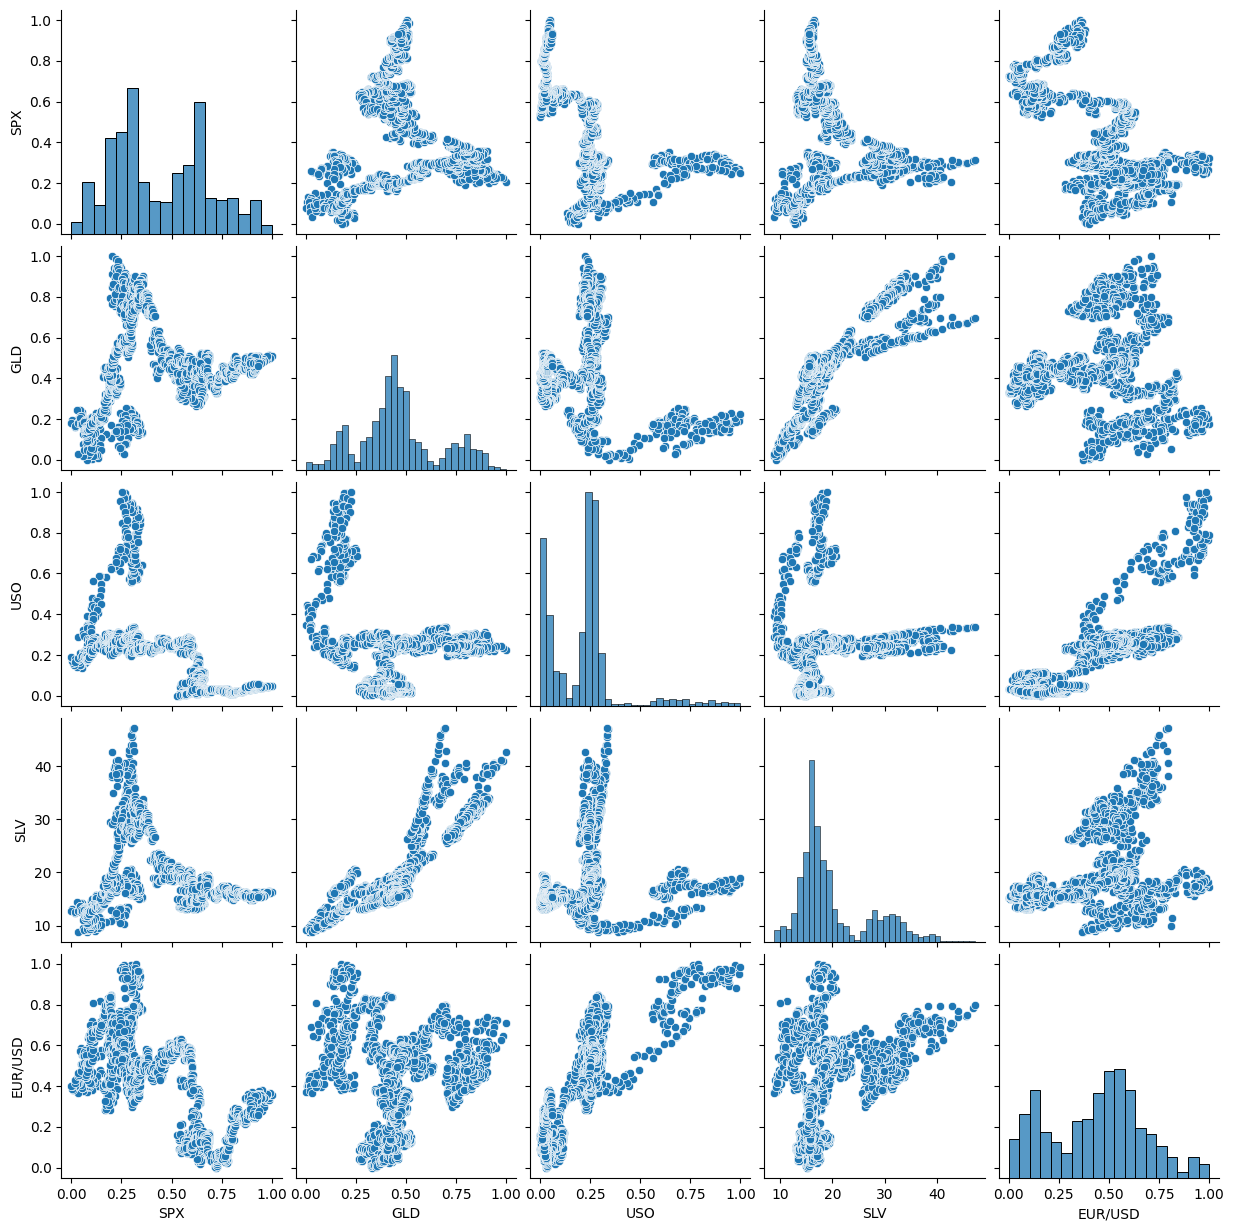

In [151]:
sns.pairplot(df)

In [124]:
df.corr()['GLD']

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

# Create Model:
 - Split Data
 - Train Test
 - Model Evalution
 - Deployment

In [125]:
X=df[['USO','SLV']].values
y=df['GLD'].values

In [126]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [127]:
poly=PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

In [128]:
model=LinearRegression()

In [129]:
model.fit(X_train_poly,y_train)

LinearRegression()

In [138]:
y_pre=model.predict(X_test_poly)
y_pre_t=model.predict(X_train_poly)

In [146]:
X_train_plot = X_train[:, 0]  # Only using first feature (USO) for plotting
X_test_plot = X_test[:, 0]

# Sort values for smooth plotting
sorted_indices_train = np.argsort(X_train_plot)
sorted_indices_test = np.argsort(X_test_plot)

X_train_plot = X_train_plot[sorted_indices_train]
y_train_pred = y_train_pred[sorted_indices_train]

X_test_plot = X_test_plot[sorted_indices_test]
y_test_pred = y_test_pred[sorted_indices_test]


In [147]:
train_mse = mean_absolute_error(y_train, y_pre_t)
test_mse =  mean_absolute_error(y_test, y_pre)
r2 = r2_score(y_test, y_pre)

print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"R² Score: {r2:.4f}")

Train MSE: 0.04
Test MSE: 0.04
R² Score: 0.9395


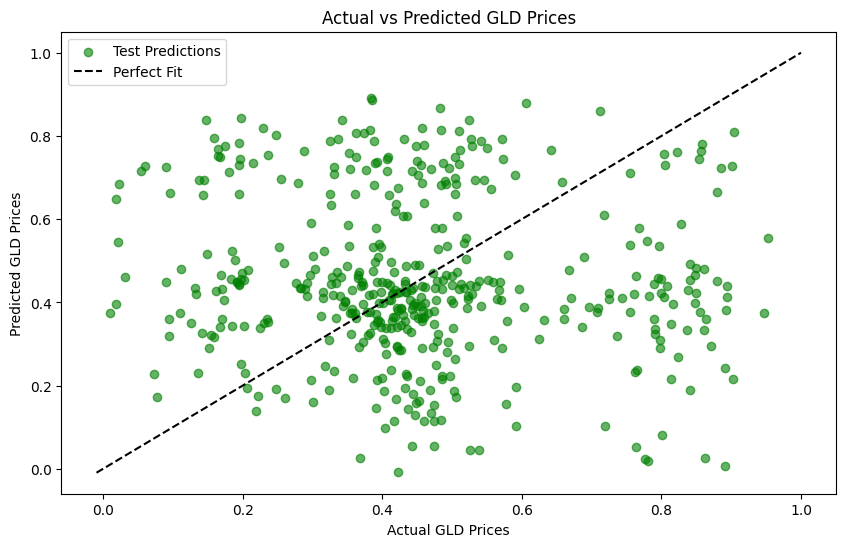

In [150]:

plt.figure(figsize=(10, 6))

# Scatter plot for Actual vs Predicted values
plt.scatter(y_test, y_test_pred, color='green', label='Test Predictions', alpha=0.6)

# Plot a perfect prediction reference line (y = x)
min_val = min(y.min(), y_train_pred.min(), y_test_pred.min())
max_val = max(y.max(), y_train_pred.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='black', label="Perfect Fit")

# Labels and Title
plt.xlabel("Actual GLD Prices")
plt.ylabel("Predicted GLD Prices")
plt.title("Actual vs Predicted GLD Prices")
plt.legend()
plt.show()
